In [14]:
import pandas as pd
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

#### The aim of the below code is to easen uo the performance evaluation while building the decision tree models. THe following function takes in the independent and dependent variables as the arguments and returns a graph that plots the accuracy against the varying depth, which would aid in understanding the optimal depth for the particular tree

In [10]:
def optimal_depth_analyzer(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1234)
    ds_new1 = pd.DataFrame([])
    Training_Accuracy = []
    Testing_Accuracy = []
    Accuracy = []
    Type = []
    Tree_Depth = []
    for i in range(1,50):
        clf = DecisionTreeClassifier(criterion='gini', 
                                      splitter='best', 
                                      max_depth=i,
                                      min_samples_split=10, 
                                      min_samples_leaf=10, 
                                      min_weight_fraction_leaf=0.0, 
                                      max_features=None, 
                                      random_state=None, 
                                      max_leaf_nodes=None, 
                                      min_impurity_split=1e-07, 
                                      class_weight=None, 
                                      presort=False)
        clf = clf.fit(X_train, Y_train)
        #print clf.feature_importances_
        pred_Y_train = clf.predict(X_train)
        pred_Y_test = clf.predict(X_test)
        Tree_Depth.append(i)
        Tree_Depth.append(i)
        #Training_Accuracy.append(metrics.accuracy_score(pred_Y_train,Y_train))
        #Testing_Accuracy.append(metrics.accuracy_score(pred_Y_test,Y_test))
        Accuracy.append(metrics.accuracy_score(pred_Y_train,Y_train))
        Accuracy.append(metrics.accuracy_score(pred_Y_test,Y_test))
        Type.append(['Training'])
        Type.append(['Testing'])
    #print Tree_Depth
    ds_new1['Tree_Depth'] = pd.DataFrame(Tree_Depth, columns = ['Tree_Depth'])
    #ds_new1['Training_Accuracy'] = pd.DataFrame(Training_Accuracy, columns = ['Training_Accuracy'])
    #ds_new1['Testing_Accuracy'] = pd.DataFrame(Testing_Accuracy, columns = ['Testing Accuracy'])
    ds_new1['Accuracy'] = pd.DataFrame(Accuracy, columns = ['Accuracy'])
    ds_new1['Type'] = pd.DataFrame(Type, columns = ['Type'])
    plt.figure(figsize = (14,6))
    sns.pointplot(data = ds_new1, x = 'Tree_Depth', y = 'Accuracy', hue = 'Type', join = True, ci=0)
    plt.ylabel('Accuracy')
    plt.title('Testing and Training Accuracies across Tree Depth')
    plt.show()
    
    

#### The following are just lines of script to read in a dataset to evaluate how the analzyer works

In [3]:
ds = pd.read_csv("C:\Users\Vignesh\Downloads\\blood_donation.csv")

In [4]:
ds_new = ds.rename(index = str, columns = {'Unnamed: 0': 'ID', 'Months since Last Donation':'MSLD', 'Number of Donations': 'No_of_Dons', 'Total Volume Donated (c.c.)': 'Volume_Donated', 'Months since First Donation':'MSFD', 'Made Donation in March 2007':'Y'})

In [5]:
ds_new = ds_new.drop('ID',1)
Y = ds_new['Y']
ds_new = ds_new.drop('Y',1)
X = ds_new

In [7]:
X['Months_per_don'] = (X['MSFD'])/ (X['No_of_Dons'])
X['sig_var'] = abs(X['Months_per_don'] - X['MSLD'])

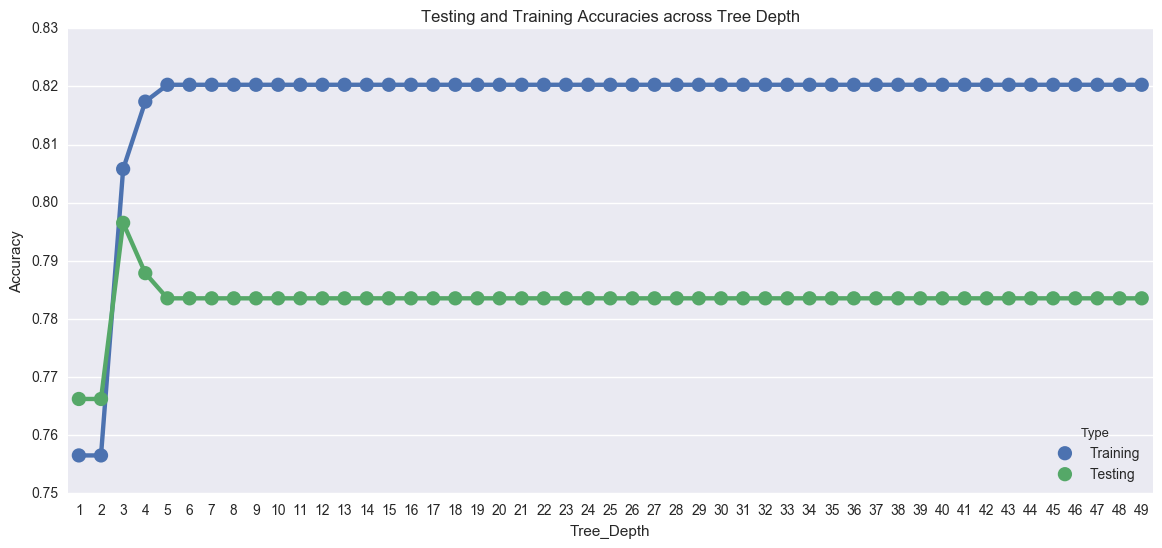

In [15]:
optimal_depth_analyzer(X,Y)